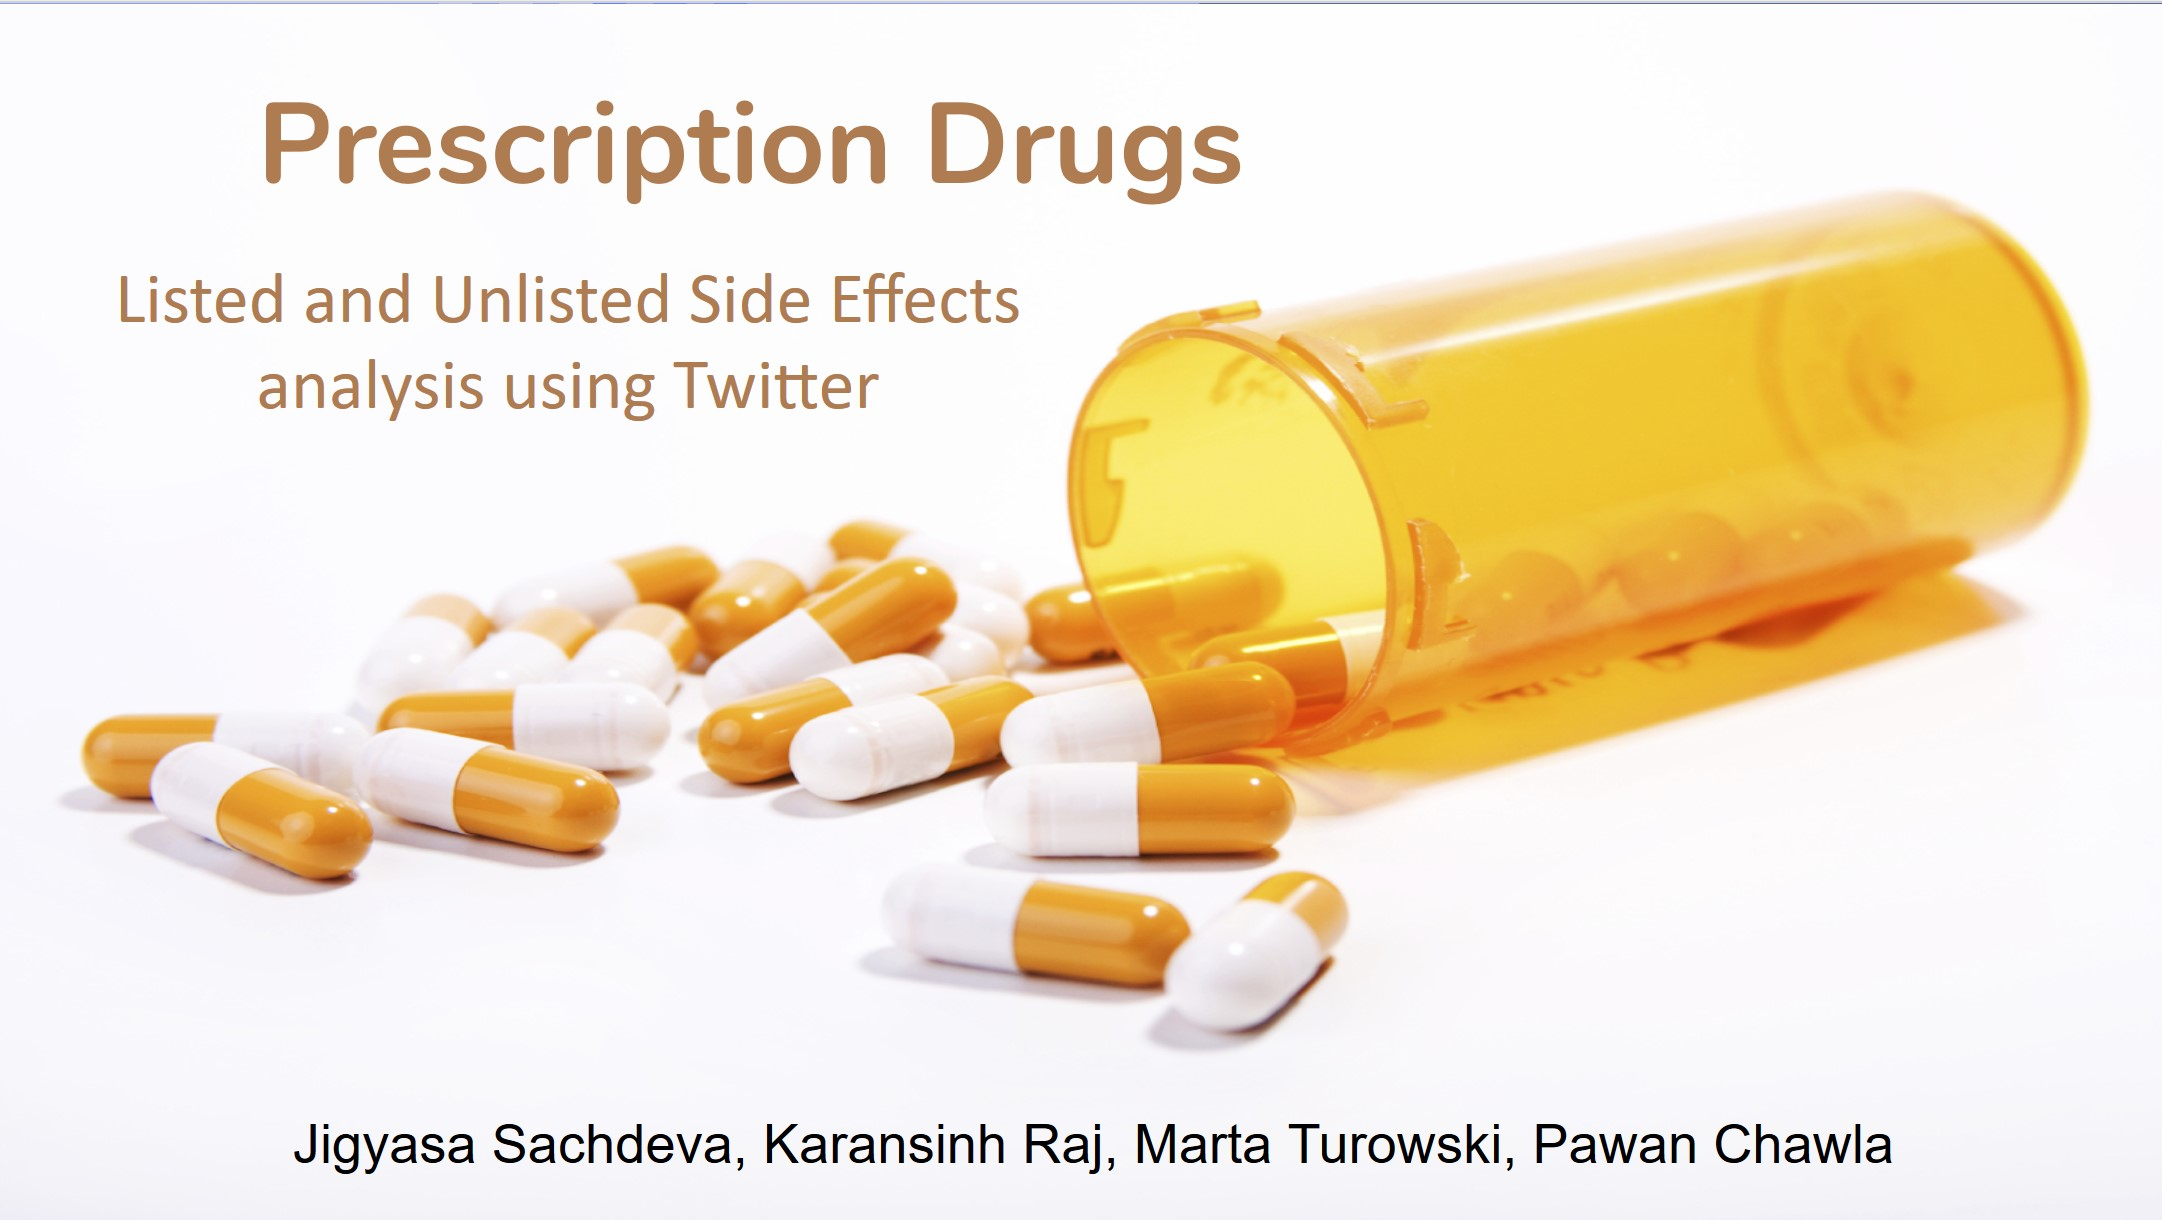

## *1. Importing Necessary Packages and setting the Work Directory:*

In [ ]:
import re
import string
import pandas as p
import numpy as np
import datetime
import os
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 

os.path.abspath(os.getcwd())
os.chdir('K:/RajK/Final')
input_path = 'K:/RajK/Final'
output_path = 'K:/RajK/Final/cleaned'

import warnings
warnings.filterwarnings("ignore")

## *2. Assigning stop words, root words, punctuations and Personal Pronoun list:*

In [ ]:
lemmatizer = WordNetLemmatizer()
my_stopwords = nltk.corpus.stopwords.words('english')
word_rooter = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@â'
Semantics=['linked to','threw me','induces','gave me','give me','resulted into', 'resulted to','as a result','as a result of', 'because of', 'owing to', 'as consequence of', 'by reason of', 'on account of', 'in consequence of', 'on the basis of','because','due to','consequence of','because of','causes into', 'caused', 'triggered','led to','leads']
IMeMyself=['i','im', 'me', 'my', 'mine', 'myself', 'she', 'he', 'her', 'him', 'you', 'thou', 'your', 'have', 'has', 'we']

## *3. Creating a Master Clean Function:*

### *3.1 Importing All Side-Effects List:*

In [ ]:
All_Side_Effects = p.DataFrame(p.read_excel("ALL_SideEffects.xlsx"))
List_SideEffects = []
for i in range(len(All_Side_Effects)):
    SE = All_Side_Effects.SE[i]
    List_SideEffects.append(SE)

### *3.2 Drug Specific Listed Sede-Effect Importing Function:*

In [ ]:
def DrugSEClean (csv):
    Drug_SE=p.DataFrame(p.read_excel(csv))
    Drug1_SideEffects = []
    for i in range(len(Drug_SE)):
        Drug1_SideEffects.append(i)
    return Drug1_SideEffects

### *3.3 Cleaning Function that returns Cleaned Tweet Tockens and Cleaned Tweets:*

In [ ]:
def remove_links(tweet):
    tweet = re.sub(r'http\S+', '', tweet) 
    tweet = re.sub(r'bit.ly/\S+', '', tweet) 
    tweet = tweet.strip('[link]') 
    return tweet
def remove_users(tweet):
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) 
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) 
    return tweet
def reduce_lengthening(word):
    pattern = re.compile(r"(.)\1{2,}")
    return pattern.sub(r"\1\1", word)
from autocorrect import Speller
from autocorrect import Speller
spell = Speller(lang='en')
def clean_tweets (tweet, bigrams=False):
    tweet = remove_users(tweet)
    tweet = remove_links(tweet)
    tweet = tweet.lower() # lower case
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet) 
    tweet = re.sub('['+my_punctuation + ']+', ' ', tweet) 
    tweet = re.sub('\s+', ' ', tweet) 
    tweet = re.sub('([0-9]+)', '', tweet) 
    tweet_token_list = [word for word in tweet.split(' ') if word not in my_stopwords] 
    tweet_token_list = [lemmatizer.lemmatize(word) if '#' not in word else word
                        for word in tweet_token_list]
    if bigrams:
        tweet_token_list = tweet_token_list+[tweet_token_list[i]+'_'+tweet_token_list[i+1]
                                            for i in range(len(tweet_token_list)-1)]
    tweet = ' '.join(tweet_token_list)
    return tweet
def clean_tokens (tweet):
    tweet_token_list = [word for word in tweet.split(' ') if word not in my_stopwords]
    while ('') in tweet_token_list: tweet_token_list.remove('')
    return tweet_token_list

### *3.4 Sorting and Filtering Algorith, that counts the presence of Listed as well as Un-listed Side-Effects in a tweet:*

In [ ]:
def count_prescribed (cleaned_tweet):
    j=0
    prescribed_token = []
    for i in (Drug1_SideEffects):
        if ((cleaned_tweet.find(i) != -1) and (i not in prescribed_token)):
            j+=1
            prescribed_token.append(i)
    Dict = {j : sorted(prescribed_token)}
    return Dict
def count_UNprescribed (cleaned_tweet):
    j=0
    UNprescribed_token = []
    for i in (List_SideEffects):
        if ((cleaned_tweet.find(i) != -1) and (i not in Drug1_SideEffects) and (i not in UNprescribed_token)):
            j+=1
            UNprescribed_token.append(i)
    Dict = {j : sorted(UNprescribed_token)}
    return Dict

### *3.5 Checking for Organizational Tweeter handle based on I ME Myself Words, and Assigning 1 to Organizatinal Handles. Also, writing a function for Sementic Word Check in the Tweet and assign Sementic Score of 1 for Potential Tweets:*

In [ ]:
def org_check (tweet):
    tweet = tweet.lower() # lower case
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet) # remove the # in #hashtag
    tweet = re.sub('['+my_punctuation + ']+', ' ', tweet) # strip punctuation
    #tweet = re.sub('\s+', ' ', tweet) #remove double spacing
    #tweet = re.sub('([0-9]+)', '', tweet) # remove numbers
    tweet_token_list = [word for word in tweet.split(' ')]
    for word in tweet_token_list:
        if (word in IMeMyself):
            a=0
            break
        else: a=1
    return a
def SementicScore (cleaned_tweet):
    j=0
    for i in Semantics:
        if (cleaned_tweet.find(i) != -1):
            j+=1
        else: continue 
    return j

### *3.6 Combining All the previously made functions in to a common Master Function:*

In [ ]:
def clean_master (df, Org_1, Clean_Tweets, Clean_Tweet_Tokens, Prescribed_Key_Value, UNPrescribed_Key_Value, Sementic_score):
    print("                  Step 1 of 7 >>> Cleaning Started")
    df[Org_1]=df.Tweet.apply(org_check)
    print ("                  Step 2 of 7 >>> Organization Checked")
    df[Clean_Tweets]=df.Tweet.apply(clean_tweets)
    print ("                  Step 3 of 7 >>> Tweets Cleaned")
    df[Clean_Tweet_Tokens]=df.Clean_Tweets.apply(clean_tokens)
    print ("                  Step 4 of 7 >>> Cleaned Tweets Tocanised")
    df[Prescribed_Key_Value] = df.Clean_Tweets.apply(count_prescribed)
    print ("                  Step 5 of 7 >>> Key Value pair for Prescribed Prepared")
    df[UNPrescribed_Key_Value] = df.Clean_Tweets.apply(count_UNprescribed)
    print ("                  Step 6 of 7 >>> Key Value pair for UN Prescribed Prepared")
    df[Sementic_score] = df.Clean_Tweets.apply(SementicScore)
    print ("                  Step 7 of 7 >>> Semantic Scoring Done")
    return df
def drugClean(UFfile, SEfile, OPname):
    Data=p.DataFrame(p.read_csv(UFfile))
    Drug1_SideEffects = DrugSEClean(SEfile)
    Clean_Data = clean_master(Data,"Org1","Clean_Tweets", "Clean_Tweet_Tokens", "Prescribed_Key_Value", "UNPrescribed_Key_Value", "Senamtic_Scores")
    return (Clean_Data.to_excel(r'K:/RajK/Final/Semantic/'+str(OPname)))

## *4. Deployment of Master Function for All the 7 Drugs:*

In [54]:
drugs=['_1Albuterol','_2Amoxicillin','_3Levothyroxine', '_4Lipitor', '_5Sertraline','_6Warfarin','_7Neurontin']
DrugName=[]
SEName=[]
OPName=[]
for i in range(len(drugs)):
    DrugName.append(str(drugs[i])+'_UF.csv')
    SEName.append(str(drugs[i])+'_SE.xlsx')
    OPName.append(str(drugs[i])+'.xlsx')
    print("--------------------------- Drug Cleaning Master Function Init ------------------------ \n")
    print("Cleaning Started for Drug No. "+ str(i)+" Out of 7 -> "+str(drugs[i])+"\n")
    drugClean(DrugName[i],SEName[i],OPName[i])

--------------------------- Drug Cleaning Master Function Init ------------------------ 

Cleaning Started for Drug No. 0 Out of 7 -> _1Albuterol

Cleaning Started
Organization Checked
Tweets Cleaned
Cleaned Tweets Tocanised
Key Value pair for Prescribed Prepared
Key Value pair for UN Prescribed Prepared
Semantic Scoring Done
--------------------------- Drug Cleaning Master Function Init ------------------------ 

Cleaning Started for Drug No. 1 Out of 7 -> _2Amoxicillin

Cleaning Started
Organization Checked
Tweets Cleaned
Cleaned Tweets Tocanised
Key Value pair for Prescribed Prepared
Key Value pair for UN Prescribed Prepared
Semantic Scoring Done
--------------------------- Drug Cleaning Master Function Init ------------------------ 

Cleaning Started for Drug No. 2 Out of 7 -> _3Levothyroxine

Cleaning Started
Organization Checked
Tweets Cleaned
Cleaned Tweets Tocanised
Key Value pair for Prescribed Prepared
Key Value pair for UN Prescribed Prepared
Semantic Scoring Done
----------